In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('../input/google-stock-price/Google_Stock_Price_Train.csv')

In [4]:
df.shape

(1258, 6)

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
df.shape

(1258, 6)

In [7]:
import matplotlib.pyplot as plt

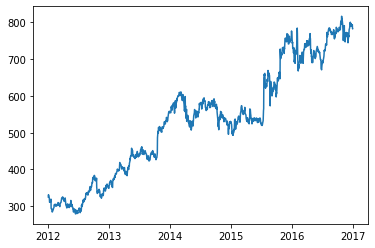

In [8]:
plt.plot(pd.to_datetime(df['Date']) ,df['Open'])


In [9]:
price = df[['Open']]

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
price_scaled = scaler.fit_transform(price)

In [12]:
price_scaled.shape  #2D object

(1258, 1)

In [13]:
X = []
for i in range(1198):
    row = price_scaled[i:i+61:,0]
    X.append(row)
X = np.array(X)
X.shape

(1198, 61)

In [14]:
X_train, y_train = X[:,:-1], X[:,-1] 

In [15]:
X_train.shape, y_train.shape

((1198, 60), (1198,))

In [16]:
X_train = X_train.reshape(1198,60,1)

In [17]:
X_train.shape

(1198, 60, 1)

In [ ]:
# Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
model = Sequential()
model.add(LSTM(100, return_sequences = True, input_shape=(60,1)))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100, return_sequences = False))
model.add(Dense(1))

model.compile(loss='mean_squared_error')

In [ ]:
model.fit(X_train,y_train,epochs=50, batch_size=32)

In [ ]:
# Model Evaluation test data
df_test = pd.read_csv('../input/google-stock-price/Google_Stock_Price_Test.csv')

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(pd.to_datetime(df_test['Date']),df_test['Open'])

In [ ]:
df.tail()

In [ ]:
#Last sixty days data

df[['Open']].iloc[-60:] 

In [ ]:
df_test[['Open']]

In [ ]:
test_data = pd.concat([df[['Open']].iloc[-60:] ,df_test[['Open']]])

In [ ]:
test_data


In [ ]:
test_scaled = scaler.transform(test_data)


In [ ]:
test_scaled.shape # 80-60 =20  no_day =80, time_step=60, range = 20

In [ ]:
X = []
for i in range(20):
    row = test_scaled[i:i+60:,0]
    X.append(row)
X = np.array(X)
X.shape

In [ ]:
X_test = X.reshape(20,60,1)

In [ ]:
yp = model.predict(X_test)

In [ ]:
yp

In [ ]:
yp = scaler.inverse_transform(yp)

In [ ]:
yp

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_test['Open'])
plt.plot(yp)